# Regularization and Optimization in Neural Networks

## Regularization of NNs

Does regularization make sense in the context of neural networks? <br/>

Yes! We still have all of the salient ingredients: a loss function, overfitting vs. underfitting, and coefficients (weights) that could get too large.

But there are now a few different flavors besides L1 and L2 regularization. (Note that L1 regularization is not common in the context of  neural networks.)

In [33]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical #basically for one hot encoding the Y, output (wine dataset: "quality")
from matplotlib import pyplot as plt
%matplotlib inline

In [34]:
# Reading in the dataset

wine = pd.read_csv('wine.csv')
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,red_wine
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


In [35]:
# Investigating our target

wine['quality'].value_counts() #7 possibilities from rating 3-9

6    2836
5    2138
7    1079
4     216
8     193
3      30
9       5
Name: quality, dtype: int64

In [36]:
# Re-calibrating

wine['quality'] = wine['quality'].map(lambda x: x-3)

In [37]:
wine['quality'].value_counts()

3    2836
2    2138
4    1079
1     216
5     193
0      30
6       5
Name: quality, dtype: int64

In [38]:
# Defining X and y

X = wine.drop('quality',axis=1)
y = wine['quality']

In [39]:
# Splitting and scaling

X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=42)

ss = StandardScaler()
X_train_s = ss.fit_transform(X_train)
X_test_s = ss.transform(X_test)

/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/envs/learn-env/lib/python3.6/site-packages/sklearn/base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:7: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  import sys


In [40]:
y_train[:5]

1539    2
1109    3
100     3
5477    2
6416    3
Name: quality, dtype: int64

In [41]:
# Encoding our target

y_train = to_categorical(y_train) #run only once

In [42]:
y_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

In [43]:
y_test = to_categorical(y_test) #run only once

In [44]:
# Constructing our model

model = Sequential()
n_input = X_train_s.shape[1]
n_hidden = n_input

model.add(Dense(n_hidden, input_dim=n_input, activation='relu'))

# We want to predict probabilities, so we'll use a softmax activation
#7 neurons because of the 7 quality types
model.add(Dense(7, activation='softmax'))

In [46]:
# Compiling: 
# Taking model that was just built, and state loss function, optimizer, and metrics BEFORE fit

# We want to use categorical crossentropy as our optimizer

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc']) 

In [47]:
# Fitting and saving the history log

history_log = model.fit(X_train_s, y_train, 
                        validation_data=(X_test_s, y_test), 
                        epochs=42, batch_size=None) 


Train on 4872 samples, validate on 1625 samples
Epoch 1/42
4872/4872 [==============================] - 1s 299us/step - loss: 1.6884 - acc: 0.3126 - val_loss: 1.4251 - val_acc: 0.4468
Epoch 2/42
4872/4872 [==============================] - 0s 67us/step - loss: 1.3234 - acc: 0.4600 - val_loss: 1.2498 - val_acc: 0.4886
Epoch 3/42
4872/4872 [==============================] - 0s 79us/step - loss: 1.2110 - acc: 0.4977 - val_loss: 1.1893 - val_acc: 0.5157
Epoch 4/42
4872/4872 [==============================] - 0s 66us/step - loss: 1.1654 - acc: 0.5174 - val_loss: 1.1636 - val_acc: 0.5262
Epoch 5/42
4872/4872 [==============================] - 0s 72us/step - loss: 1.1371 - acc: 0.5287 - val_loss: 1.1447 - val_acc: 0.5391
Epoch 6/42
4872/4872 [==============================] - 0s 59us/step - loss: 1.1169 - acc: 0.5392 - val_loss: 1.1289 - val_acc: 0.5403
Epoch 7/42
4872/4872 [==============================] - 0s 76us/step - loss: 1.1019 - acc: 0.5480 - val_loss: 1.1219 - val_acc: 0.5354
Epoch 

In [48]:
# Extracting weights

for layer in model.layers:
    print(layer.get_weights())

[array([[-7.00790465e-01, -5.29737532e-01,  7.65274540e-02,
         1.21014535e-01, -1.12161756e-01, -7.21010193e-02,
         8.64845142e-02, -5.18596649e-01, -3.30102265e-01,
         3.96909155e-02, -1.23364247e-01, -1.61104217e-01],
       [ 1.51703462e-01,  6.67447925e-01,  1.83906436e-01,
        -6.14995837e-01,  5.15776753e-01,  8.82388800e-02,
         5.63942015e-01, -9.81786028e-02, -8.97460043e-01,
        -1.11305267e-01,  3.47352922e-01,  5.17295122e-01],
       [-6.68465316e-01, -6.33084297e-01,  1.90479815e-01,
        -4.13599700e-01,  2.85403073e-01,  2.38686241e-02,
        -2.25704536e-01,  1.88136891e-01,  1.42559394e-01,
         1.67939633e-01,  3.02600503e-01, -9.76086967e-03],
       [-1.02359846e-01,  2.02649772e-01,  1.84180558e-01,
        -4.89488896e-03, -1.12799883e-01,  5.29303998e-02,
         3.78789157e-01, -8.06768015e-02,  7.66106009e-01,
        -2.74932325e-01, -4.99074936e-01, -1.03254303e-01],
       [-3.81339759e-01,  3.55076134e-01,  1.404600

In [52]:
# Predicting on some test data

model.predict(X_test_s[:5]).round(decimals=2) #each row should sum to 1.0 given softmax

array([[0.  , 0.  , 0.05, 0.57, 0.3 , 0.08, 0.  ],
       [0.03, 0.06, 0.77, 0.14, 0.  , 0.  , 0.  ],
       [0.  , 0.01, 0.03, 0.31, 0.48, 0.17, 0.  ],
       [0.  , 0.  , 0.37, 0.54, 0.07, 0.01, 0.  ],
       [0.01, 0.01, 0.69, 0.25, 0.03, 0.01, 0.  ]], dtype=float32)

In [54]:
model.predict_classes(X_test_s[:5])

array([3, 2, 4, 3, 2])

In [55]:
# Comparing with reality

y_test[:5] 
#model predictions almost sort of match up with up with actual reality

array([[0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0.]], dtype=float32)

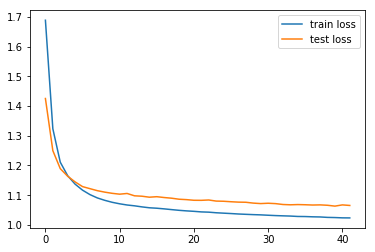

In [56]:
# Plotting

plt.plot(history_log.history['loss'], label = 'train loss')
plt.plot(history_log.history['val_loss'], label = 'test loss')
plt.legend();

- test loss begins to plateau with 42 epochs
- Let's see if kera.regularizers (Regularization) can help improve our model a bit

## Adding Regularization

In [57]:
from keras import regularizers

model_r = Sequential()

n_input = X_train_s.shape[1]
n_hidden = n_input

model_r.add(Dense(n_hidden, input_dim=n_input, activation='relu',
                 kernel_regularizer=regularizers.l2(0.01))) #add L2 regularizer (L1-L2 ratio: 0.01: 0.99)
model_r.add(Dense(7, activation='softmax',
                 kernel_regularizer=regularizers.l2(0.01))) #add L2 regularizer (L1-L2 ratio: 0.01: 0.99)

model_r.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

history_r = model_r.fit(X_train_s, y_train, validation_data=(X_test_s, y_test),
                       epochs=42, batch_size=None)

Train on 4872 samples, validate on 1625 samples
Epoch 1/42
4872/4872 [==============================] - 1s 132us/step - loss: 1.8467 - acc: 0.3183 - val_loss: 1.6102 - val_acc: 0.4166
Epoch 2/42
4872/4872 [==============================] - 0s 80us/step - loss: 1.5022 - acc: 0.4522 - val_loss: 1.4441 - val_acc: 0.4806
Epoch 3/42
4872/4872 [==============================] - 0s 66us/step - loss: 1.3913 - acc: 0.4924 - val_loss: 1.3658 - val_acc: 0.5071
Epoch 4/42
4872/4872 [==============================] - 0s 67us/step - loss: 1.3300 - acc: 0.5057 - val_loss: 1.3141 - val_acc: 0.5046
Epoch 5/42
4872/4872 [==============================] - 0s 65us/step - loss: 1.2860 - acc: 0.5207 - val_loss: 1.2775 - val_acc: 0.5175
Epoch 6/42
4872/4872 [==============================] - 0s 81us/step - loss: 1.2527 - acc: 0.5265 - val_loss: 1.2491 - val_acc: 0.5268
Epoch 7/42
4872/4872 [==============================] - 0s 74us/step - loss: 1.2260 - acc: 0.5341 - val_loss: 1.2276 - val_acc: 0.5274
Epoch 

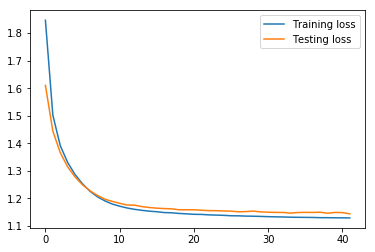

In [58]:
plt.plot(history_r.history['loss'], label='Training loss')
plt.plot(history_r.history['val_loss'], label='Testing loss')
plt.legend();

### Dropout

Here's a new regularization idea: Turn some neurons off during training. We'll assign probabilities of 'dropout' and then let fate decide.

$\rightarrow$ Why is this a good idea? *Is* it a good idea?

Was this sort of regularization available to us before? Why (not)?

- this was never available us before
- in linear regression, you're either using the feature or not

In [59]:
from keras.layers import Dropout
#TRYING TO NOT LET IT GET TOO CAUGHT UP ON ANY ONE FEATURE
#RANDOMIZES WHICH NEURONS TO TURN OFF EVERY EPOCH

model_d = Sequential()

n_input = X_train_s.shape[1]
n_hidden = n_input

In [60]:
model_d.add(Dense(n_hidden, input_dim=n_input, activation='relu'))
model_d.add(Dropout(rate=0.2)) #fraction of the input units too drop
model_d.add(Dense(7, activation='softmax'))

model_d.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

history_d = model_d.fit(X_train_s, y_train, validation_data=(X_test_s, y_test),
                       epochs=42, batch_size=None)

Train on 4872 samples, validate on 1625 samples
Epoch 1/42
4872/4872 [==============================] - 1s 190us/step - loss: 1.7554 - acc: 0.3807 - val_loss: 1.4723 - val_acc: 0.4560
Epoch 2/42
4872/4872 [==============================] - 0s 89us/step - loss: 1.4222 - acc: 0.4538 - val_loss: 1.3023 - val_acc: 0.5015
Epoch 3/42
4872/4872 [==============================] - 0s 73us/step - loss: 1.2892 - acc: 0.4745 - val_loss: 1.2271 - val_acc: 0.5132
Epoch 4/42
4872/4872 [==============================] - 0s 92us/step - loss: 1.2392 - acc: 0.4965 - val_loss: 1.1870 - val_acc: 0.5218
Epoch 5/42
4872/4872 [==============================] - 0s 75us/step - loss: 1.1882 - acc: 0.5088 - val_loss: 1.1601 - val_acc: 0.5231
Epoch 6/42
4872/4872 [==============================] - 0s 78us/step - loss: 1.1685 - acc: 0.5117 - val_loss: 1.1408 - val_acc: 0.5243
Epoch 7/42
4872/4872 [==============================] - 0s 71us/step - loss: 1.1429 - acc: 0.5148 - val_loss: 1.1275 - val_acc: 0.5231
Epoch 

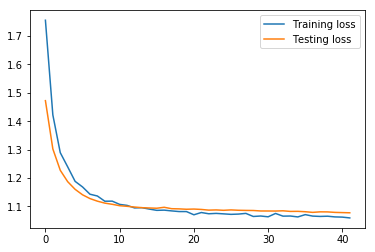

In [61]:
plt.plot(history_d.history['loss'], label='Training loss')
plt.plot(history_d.history['val_loss'], label='Testing loss')
plt.legend();

In [62]:
history_d.history['acc'][-1], history_d.history['val_acc'][-1]

(0.5502873563218391, 0.5353846151645367)

### Early Stopping

Another idea is to try to terminate the training process early, even before some pre-specified number of epochs.

$\rightarrow$ Why is this a good idea? *Is* it a good idea?

Was this sort of regularization available to us before? Why (not)?

- Helps us to avoid overfitting to training data, especially with MANY epochs
- can set this to kick in WHEN THE CHANGE IN THE TESTING LOSS BECOMES REALLY SMALL/PROGRESS BECOMES INSIGNIFICANT

In [63]:
from keras.callbacks import EarlyStopping

In [64]:
from keras.callbacks import EarlyStopping

model_es = Sequential()

n_input = X_train_s.shape[1]
n_hidden = n_input

model_es.add(Dense(n_hidden, input_dim=n_input, activation='relu'))
model_es.add(Dense(7, activation='softmax'))

model_es.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

early_stop = EarlyStopping(monitor='val_loss', min_delta=1e-08, patience=0, verbose=1, mode='auto')
#when change gets below min_delta, patience=0 means stop right away
#patience > 0 tells it your propensity for epochs without additional progress

callbacks_list = [early_stop]

history_es = model_es.fit(X_train_s, y_train, validation_data=(X_test_s, y_test),
                         epochs=42, batch_size=None, callbacks=callbacks_list)

Train on 4872 samples, validate on 1625 samples
Epoch 1/42
4872/4872 [==============================] - 1s 158us/step - loss: 1.7166 - acc: 0.3311 - val_loss: 1.4823 - val_acc: 0.3834
Epoch 2/42
4872/4872 [==============================] - 0s 65us/step - loss: 1.3658 - acc: 0.4169 - val_loss: 1.3020 - val_acc: 0.4437
Epoch 3/42
4872/4872 [==============================] - 0s 66us/step - loss: 1.2458 - acc: 0.4698 - val_loss: 1.2279 - val_acc: 0.4911
Epoch 4/42
4872/4872 [==============================] - 0s 86us/step - loss: 1.1920 - acc: 0.4951 - val_loss: 1.1902 - val_acc: 0.5095
Epoch 5/42
4872/4872 [==============================] - 0s 74us/step - loss: 1.1623 - acc: 0.5064 - val_loss: 1.1691 - val_acc: 0.5132
Epoch 6/42
4872/4872 [==============================] - 0s 69us/step - loss: 1.1430 - acc: 0.5160 - val_loss: 1.1539 - val_acc: 0.5262
Epoch 7/42
4872/4872 [==============================] - 0s 71us/step - loss: 1.1288 - acc: 0.5218 - val_loss: 1.1443 - val_acc: 0.5249
Epoch 

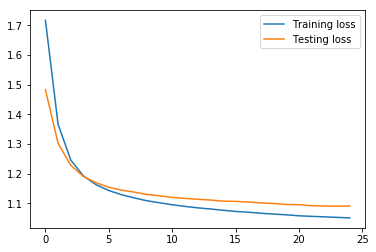

In [65]:
plt.plot(history_es.history['loss'], label='Training loss')
plt.plot(history_es.history['val_loss'], label='Testing loss')
plt.legend();